In [1]:
import tifffile as tiff
import numpy as np
import glob
import os

folder = r"D:\Documents\AEC\FInal Year Project\maked images 4 years"
files = glob.glob(os.path.join(folder, "*.tif"))
ratios = []
for f in files:
    img = tiff.imread(f).astype(np.float32)
    cloud_ratio = np.mean(img)   # mean of 0s and 1s = ratio of 1s
    ratios.append((os.path.basename(f), cloud_ratio))
# Print
for name, ratio in ratios:
    print(f"{name}: Cloud cover = {ratio*100:.2f}%")


S2_Guwahati_Apr2021_Raster.tif: Cloud cover = 5.06%
S2_Guwahati_Apr2022_Raster.tif: Cloud cover = 88.47%
S2_Guwahati_Apr2023_Raster.tif: Cloud cover = 0.41%
S2_Guwahati_Apr2024_Raster.tif: Cloud cover = 7.59%
S2_Guwahati_Aug2021_Raster.tif: Cloud cover = 90.62%
S2_Guwahati_Aug2022_Raster.tif: Cloud cover = 56.26%
S2_Guwahati_Aug2023_Raster.tif: Cloud cover = 78.15%
S2_Guwahati_Aug2024_Raster.tif: Cloud cover = 22.12%
S2_Guwahati_Dec2021_Raster.tif: Cloud cover = 5.47%
S2_Guwahati_Dec2022_Raster.tif: Cloud cover = 57.24%
S2_Guwahati_Dec2023_Raster.tif: Cloud cover = 0.02%
S2_Guwahati_Dec2024_Raster.tif: Cloud cover = 8.99%
S2_Guwahati_Feb2021_Raster.tif: Cloud cover = 3.22%
S2_Guwahati_Feb2022_Raster.tif: Cloud cover = 82.60%
S2_Guwahati_Feb2023_Raster.tif: Cloud cover = 9.30%
S2_Guwahati_Feb2024_Raster.tif: Cloud cover = 47.38%
S2_Guwahati_Jan2021_Raster.tif: Cloud cover = 16.87%
S2_Guwahati_Jan2022_Raster.tif: Cloud cover = 37.46%
S2_Guwahati_Jan2023_Raster.tif: Cloud cover = 0.06%
S2

In [15]:
import os
import glob
import tifffile as tiff
import numpy as np
import pandas as pd
import re

folder = r"D:\Documents\AEC\FInal Year Project\maked images 4 years"
files = glob.glob(os.path.join(folder, "*.tif"))

# Fix incorrect or abbreviated month names
month_fix_map = {
    'Jan':'Jan','Jna':'Jan',
    'Feb':'Feb','Fev':'Feb',
    'Mar':'Mar',
    'Apr':'Apr','Arp':'Apr','Aprl':'Apr',
    'May':'May',
    'Jun':'Jun',
    'Jul':'Jul',
    'Aug':'Aug',
    'Sep':'Sep','Sept':'Sep',
    'Oct':'Oct',
    'Nov':'Nov',
    'Dec':'Dec'
}

# Convert short → full month name
month_fullname_map = {
    'Jan':'January',
    'Feb':'February',
    'Mar':'March',
    'Apr':'April',
    'May':'May',
    'Jun':'June',
    'Jul':'July',
    'Aug':'August',
    'Sep':'September',
    'Oct':'October',
    'Nov':'November',
    'Dec':'December'
}

data = []

for f in files:
    img = tiff.imread(f).astype(np.float32)
    ratio = np.mean(img)

    name = os.path.basename(f)
    monthyear = name.split("_")[2]          # e.g., "Apr2024"

    match = re.match(r"([A-Za-z]+)(\d+)", monthyear)
    month_abbr = match.group(1)
    year = int(match.group(2))

    # Fix typo short form → standard short form
    month_abbr = month_fix_map.get(month_abbr, month_abbr)

    # Convert short → full month
    month_full = month_fullname_map[month_abbr]

    data.append((name, month_full, year, ratio))

df = pd.DataFrame(data, columns=["Filename", "Month", "Year", "Cloud_Ratio"])
print(df.head())


                         Filename   Month  Year  Cloud_Ratio
0  S2_Guwahati_Apr2021_Raster.tif   April  2021     0.050577
1  S2_Guwahati_Apr2022_Raster.tif   April  2022     0.884717
2  S2_Guwahati_Apr2023_Raster.tif   April  2023     0.004140
3  S2_Guwahati_Apr2024_Raster.tif   April  2024     0.075913
4  S2_Guwahati_Aug2021_Raster.tif  August  2021     0.906195


In [17]:
df.to_csv(os.path.join(folder, "cloud_cover_dataset.csv"), index=False)
print("✅ Saved dataset as cloud_cover_dataset.csv")


✅ Saved dataset as cloud_cover_dataset.csv


In [19]:
df.head(10)

,Filename,Month,Year,Cloud_Ratio
0,S2_Guwahati_Apr2021_Raster.tif,April,2021,0.050577
1,S2_Guwahati_Apr2022_Raster.tif,April,2022,0.884717
2,S2_Guwahati_Apr2023_Raster.tif,April,2023,0.004140
3,S2_Guwahati_Apr2024_Raster.tif,April,2024,0.075913
4,S2_Guwahati_Aug2021_Raster.tif,August,2021,0.906195
5,S2_Guwahati_Aug2022_Raster.tif,August,2022,0.562621
6,S2_Guwahati_Aug2023_Raster.tif,August,2023,0.781526
7,S2_Guwahati_Aug2024_Raster.tif,August,2024,0.221247
8,S2_Guwahati_Dec2021_Raster.tif,December,2021,0.054705
9,S2_Guwahati_Dec2022_Raster.tif,December,2022,0.572359


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Filename     48 non-null     object 
 1   Month        48 non-null     object 
 2   Year         48 non-null     int64  
 3   Cloud_Ratio  48 non-null     float32
dtypes: float32(1), int64(1), object(2)
memory usage: 1.4+ KB


In [23]:
df.describe()

,Year,Cloud_Ratio
count,48.000000,48.000000
mean,2022.500000,0.361686
std,1.129865,0.303884
min,2021.000000,0.000229
25%,2021.750000,0.073346
50%,2022.500000,0.276903
75%,2023.250000,0.619910
max,2024.000000,0.906195


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

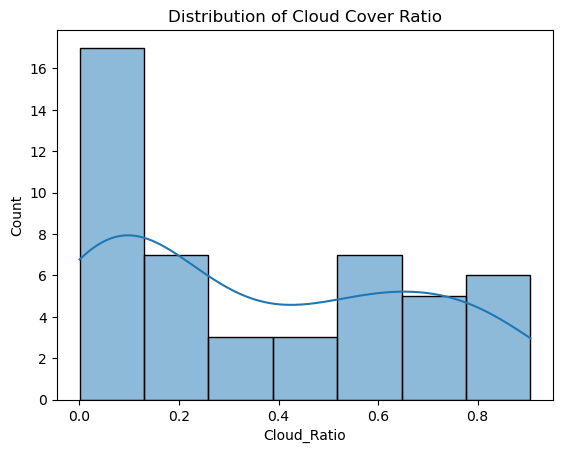

In [27]:
sns.histplot(df['Cloud_Ratio'], kde=True)
plt.title("Distribution of Cloud Cover Ratio")
plt.show()

## Average Cloud Cover by Month

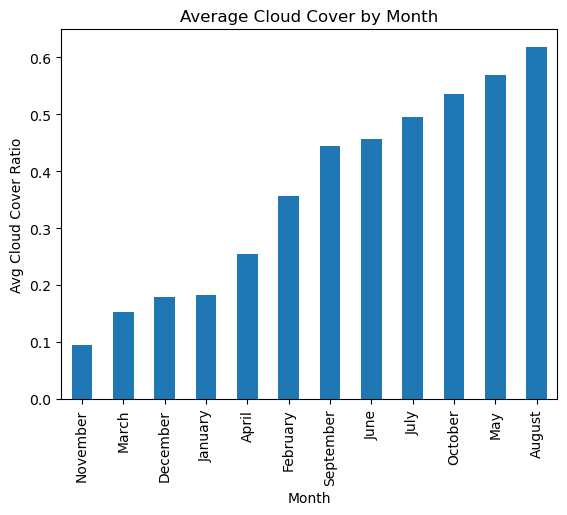

In [29]:
df.groupby("Month")["Cloud_Ratio"].mean().sort_values().plot(kind='bar')
plt.ylabel("Avg Cloud Cover Ratio")
plt.title("Average Cloud Cover by Month")
plt.show()

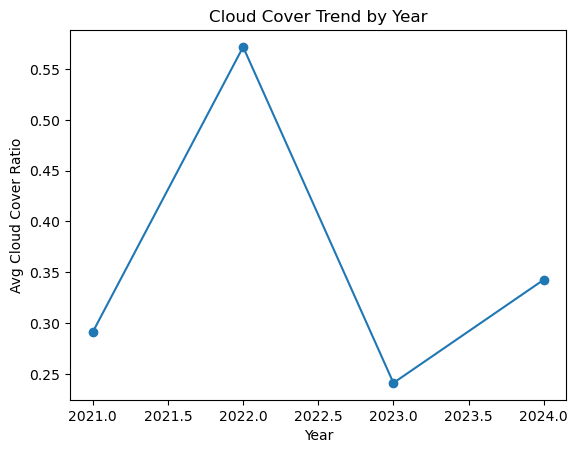

In [32]:
df.groupby("Year")["Cloud_Ratio"].mean().plot(kind='line', marker='o')
plt.ylabel("Avg Cloud Cover Ratio")
plt.title("Cloud Cover Trend by Year")
plt.show()

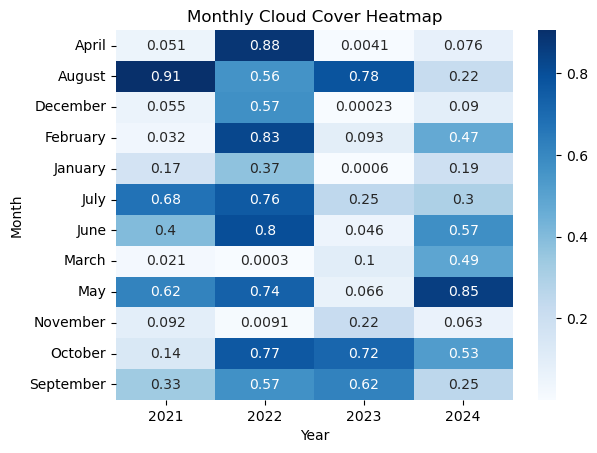

In [34]:
pivot = df.pivot_table(values="Cloud_Ratio", index="Month", columns="Year", aggfunc="mean")

sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title("Monthly Cloud Cover Heatmap")
plt.show()


In [ ]:
#This allows you to visually see the patterns the model will learn.

In [36]:
from sklearn.preprocessing import LabelEncoder

month_encoder = LabelEncoder()
df["Month_Label"] = month_encoder.fit_transform(df["Month"])

year_encoder = LabelEncoder()
df["Year_Label"] = year_encoder.fit_transform(df["Year"])


In [38]:
X = df[['Cloud_Ratio']]
y_month = df['Month_Label']
y_year = df['Year_Label']


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Predict Month
X_train, X_test, y_train, y_test = train_test_split(X, y_month, test_size=0.2, random_state=42)
model_month = RandomForestClassifier().fit(X_train, y_train)
print("Month Accuracy:", model_month.score(X_test, y_test))

# Predict Year
X_train, X_test, y_train, y_test = train_test_split(X, y_year, test_size=0.2, random_state=42)
model_year = RandomForestClassifier().fit(X_train, y_train)
print("Year Accuracy:", model_year.score(X_test, y_test))


Month Accuracy: 0.1
Year Accuracy: 0.3


### it means cloud cover alone is not enough → we need image features.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df[['Cloud_Ratio']]
y = df['Month_Label']   # or Year_Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

## Visualise the decision tree


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df[['Cloud_Ratio']]
y = df['Month_Label']   # or Year_Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(n_estimators=50, random_state=42)

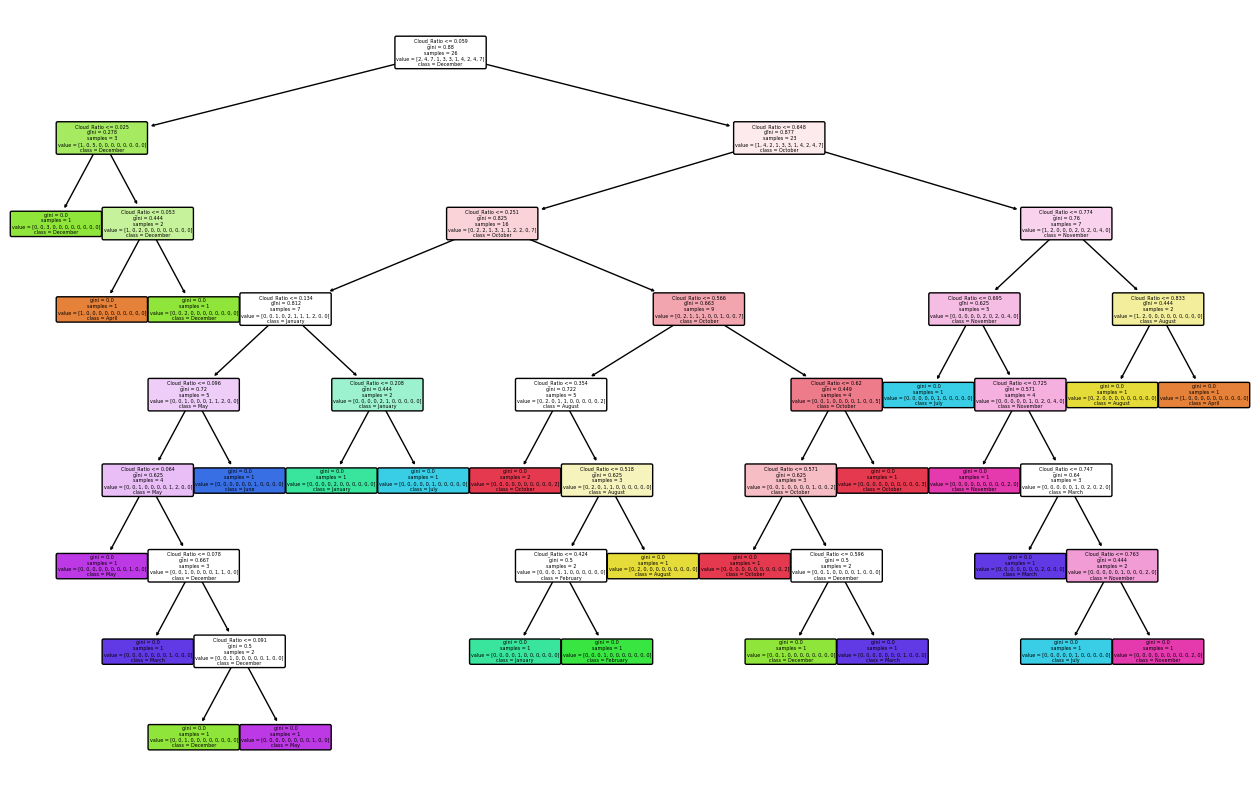

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose one tree
tree = rf_model.estimators_[0]

plt.figure(figsize=(16, 10))
plot_tree(tree, 
          feature_names=['Cloud_Ratio'], 
          class_names=df['Month'].unique(),
          filled=True, 
          rounded=True)
plt.show()


In [51]:
## simplify it
rf_model = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

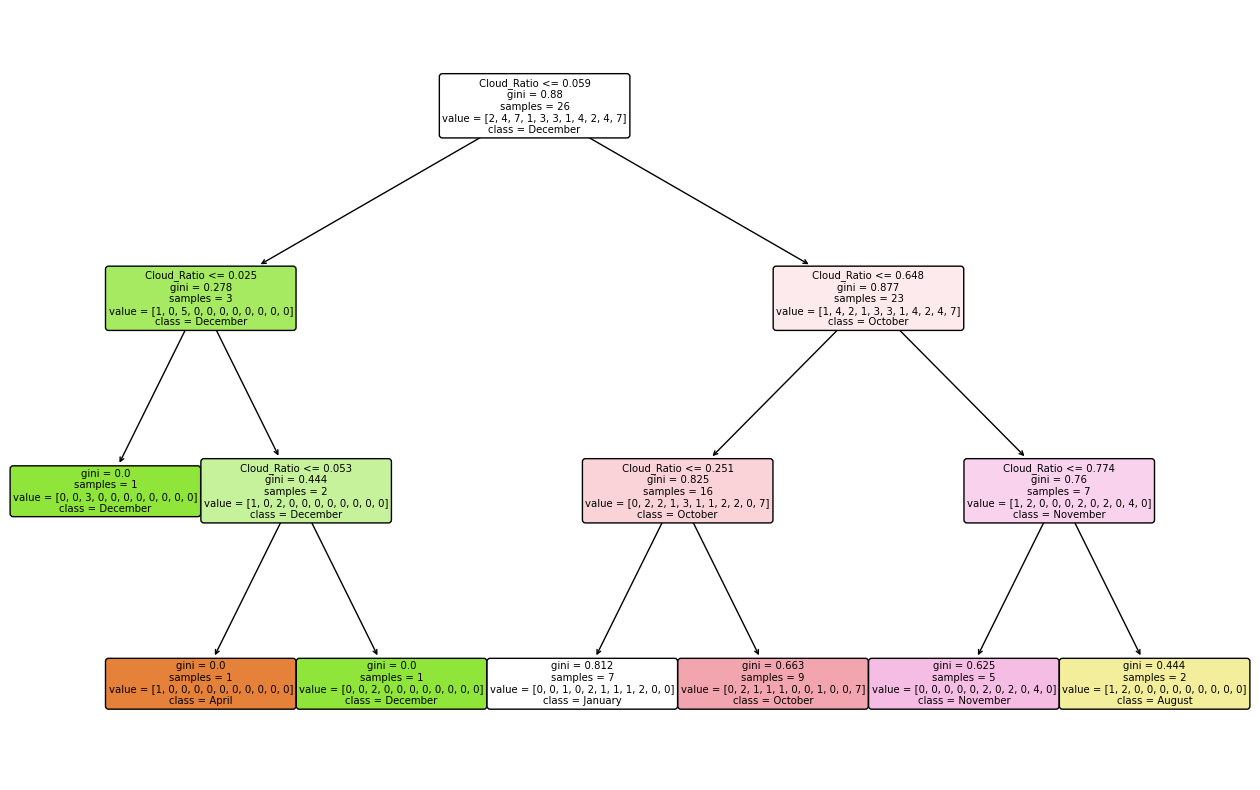

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose one tree
tree = rf_model.estimators_[0]

plt.figure(figsize=(16, 10))
plot_tree(tree, 
          feature_names=['Cloud_Ratio'], 
          class_names=df['Month'].unique(),
          filled=True, 
          rounded=True)
plt.show()
